# Resampling

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tqdm

from vmc.interface import *
from vmc import run_experiment, sample_local_energies, run_all

from IPython.core.pylabtools import figsize
from IPython.core.display import display

In [2]:
sns.set(color_codes=True)

In [3]:
mass = 1.0
omega = 1.0
hbar = 1.0

step_length = 1.0

alpha_min = 0.3
alpha_max = 0.9
num_alphas = 16

parameter_names = ["alpha"]

alphas = np.linspace(
    alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)

num_particles = 5
num_dimensions = 3

num_samples = int(1e5)
num_thermalization_steps = int(num_particles * 2000)

kwargs = {
    "num_samples": num_samples, "step_length": step_length,
    "num_thermalization_steps": num_thermalization_steps,
    "sample_local_energies": True}

In [4]:
wavefunction = PySimpleGaussian(
    num_particles, num_dimensions, mass, omega, spread=step_length)
sampler = PySampler(wavefunction, PyHarmonicOscillator(), PyImportanceMetropolis())

In [5]:
df = run_all(sampler, alphas, parameter_names, 10000, **kwargs)

 31%|███▏      | 5/16 [00:55<02:02, 11.10s/it]/home/schoyen/anaconda3/lib/python3.5/site-packages/vmc/resampling_methods.py:40: RuntimeWarning: invalid value encountered in true_divide
  factor_1 = (gamma/variances)**2
100%|██████████| 16/16 [02:59<00:00, 11.22s/it]


In [7]:
display(df)

,alpha,energy,variance,std,acceptance,boot_var,boot_std,block_var,block_std
0,0.30,8.466227,2.078303e-10,0.004559,0.79289,2.106177e-05,0.004589,0.000388,0.019707
1,0.34,8.046774,1.162973e-10,0.003410,0.75412,1.152643e-05,0.003395,0.000219,0.014800
2,0.38,7.772738,5.654912e-11,0.002378,0.71166,5.555247e-06,0.002357,0.000107,0.010367
3,0.42,7.607689,2.303611e-11,0.001518,0.67061,2.294203e-06,0.001515,0.000045,0.006726
4,0.46,7.529705,5.310487e-12,0.000729,0.62681,5.319102e-07,0.000729,0.000011,0.003329
5,0.50,7.500000,0.000000e+00,0.000000,0.58485,0.000000e+00,0.000000,0.000000,0.000000
6,0.54,7.522264,4.457523e-12,0.000668,0.54207,4.476043e-07,0.000669,0.000012,0.003439
7,0.58,7.586530,1.594444e-11,0.001263,0.50065,1.550293e-06,0.001245,0.000047,0.006838
8,0.62,7.678614,3.418047e-11,0.001849,0.46090,3.493766e-06,0.001869,0.000104,0.010181
9,0.66,7.785426,5.957374e-11,0.002441,0.42242,5.907856e-06,0.002431,0.000193,0.013886


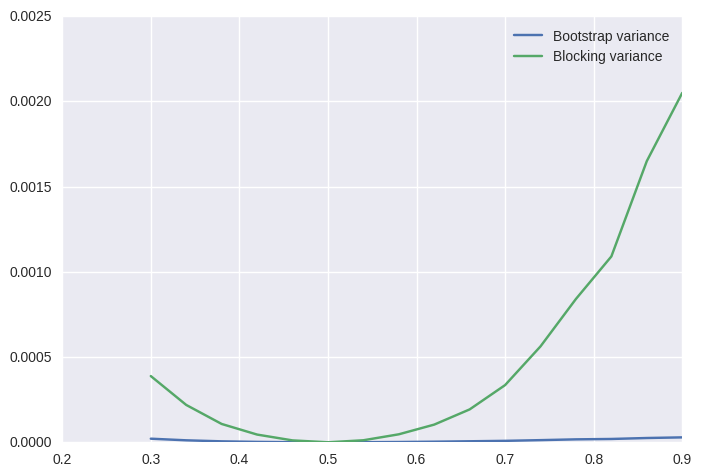

In [10]:
plt.plot(df["alpha"], df["boot_var"], label="Bootstrap variance")
plt.plot(df["alpha"], df["block_var"], label="Blocking variance")
plt.legend(loc="best")
plt.show()

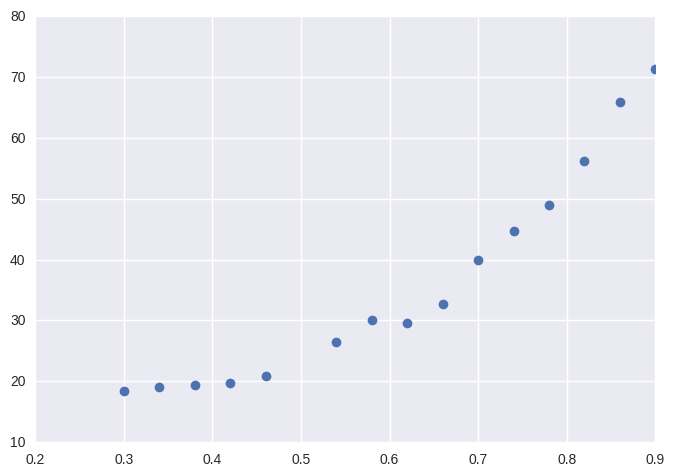

In [22]:
plt.plot(df["alpha"], df["block_var"]/df["boot_var"], "o")
plt.show()

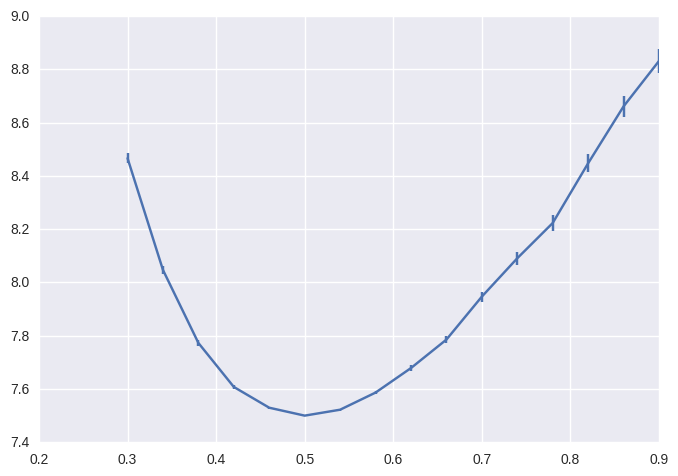

In [23]:
plt.errorbar(
    df["alpha"], df["energy"], yerr=df["block_std"])
plt.show()